# T-SNE and Reddit


## Imports and definitions

In [1]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show
from bokeh.models import CategoricalColorMapper
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.palettes import d3

output_notebook()


Loading BokehJS ...

In [2]:
cat_to_sub={
        'gaming':set(['leagueoflegends', 'gaming', 'DestinyTheGame', 'DotA2', 'ContestofChampions', 'StarWarsBattlefront', 'Overwatch', 'WWII', 'hearthstone', 'wow', 'heroesofthestorm', 'destiny2', 'darksouls3', 'fallout']),
        'mental_health':set(['SuicideWatch', 'depression', 'OCD', 'dpdr', 'proED', 'Anxiety', 'BPD', 'socialanxiety', 'mentalhealth', 'ADHD', 'bipolar']),
        'computers':set(['buildapc', 'techsupport', 'buildapcforme', 'hacker', 'SuggestALaptop', 'hardwareswap', 'laptops', 'computers', 'pcmasterrace']),
        'relationships':set(['relationshps', 'relationship_advice', 'breakups', 'dating_advice', 'LongDistance', 'polyamory', 'wemetonline']),
        'drugs':set(['MDMA', 'Drugs', 'trees', 'opiates', 'LSD']),
        'general':set([ 'tifu', 'r4r', 'AskReddit', 'reddit.com', 'tipofmytongue', 'Life', 'Advice', 'jobs', 'teenagers', 'HomeImprovement', 'redditinreddit']),
        'sports':set(['FIFA', 'nba', 'hockey', 'nfl', 'mls', 'baseball']),
        'media':set(['BokuNoHeroAcademia', 'anime', 'movies', 'StrangerThings'])
}
dictionary=cat_to_sub

sub_to_cat={}
for cat, subs in cat_to_sub.items():
    for s in subs:
        sub_to_cat[s]= cat

In [3]:
full_filename='../Spark/collection_frequencies.csv'
small_filename='collection_frequencies.csv'

def reset_input(filename):
    med=pd.read_csv(filename)
    med=med[med.subreddit.ne('subreddit')].dropna()
    med['i']=med.index.to_series().apply(lambda x: (med.loc[x,'subreddit'],med.loc[x,'month']))
    med=med.set_index('i')
    med_nums=med.iloc[:,2:-1]
    med_norm=norm.transform(med_nums.T).T
    return med, med_nums, med_norm

In [4]:
norm = Normalizer()
pca = PCA(n_components=30)
model=TSNE(n_iter=2000, perplexity=5.0)

data, data_nums, data_norm = reset_input(small_filename)
data_pca=pca.fit_transform(data_norm)

twod=model.fit_transform(data_pca)

data['Tsne1']=twod[:,0]
data['Tsne2']=twod[:,1]
data['category']=data.subreddit.apply(lambda x: sub_to_cat[x])


In [5]:
vis_data=data.loc[:,['subreddit','month','Tsne1','Tsne2','category']]
vis_data.to_csv('vis_data_cache.csv')

## Smallest visualization

In [6]:
np.random.seed(35)

norm = Normalizer()
pca = PCA(n_components=30)
model=TSNE(n_iter=3000, perplexity=5.0)

data, data_nums, data_norm = reset_input(small_filename)
data_pca=pca.fit_transform(data_norm)

twod=model.fit_transform(data_pca)

data['Tsne1']=twod[:,0]
data['Tsne2']=twod[:,1]
data['category']=data.subreddit.apply(lambda x: sub_to_cat[x])


In [51]:
data

,X1,X2,y,yhat,correct,Tsne1,Tsne2,y_str
131,JHUW1LRIY,FLAW1ER0,0,0,correct,-170.071289,-59.417755,0
1732,HHAA1G,KAW1,0,0,correct,-50.846581,-122.357170,0
4827,FAO1R,BEH1LT,0,0,correct,99.445610,-43.131168,0
985,WAA1SHKLAOTH,TAW1AH0L,0,0,correct,-77.211014,116.202530,0
1456,SEHDAH1SKOWP,STEH1THAH0SKOW2P,1,1,correct,11.682673,14.311011,1
6403,EH1MWOW,NEH1KLAH0S,1,0,incorrect,-137.554886,-56.486824,1
3742,LAH1VPEHNSAHL,TAW1AH0L,1,0,incorrect,-44.202110,128.966324,1
5786,NOW1Z,DAO1R,0,0,correct,160.455505,50.467621,0
409,HHIY1,HHAE1MER0,1,0,incorrect,60.146053,-150.928741,1
4240,NEH1S,NEH1KLAH0S,1,1,correct,-136.068878,-54.225632,1


In [8]:
#cached_data=pd.read_csv('vis_data_cache.csv', dtype={'subreddit': 'str', 'month': 'str', 'category': 'str'} )
#cached_data=cached_data.set_index('i')
#data=cached_data


In [9]:
palette = d3['Category10'][len(data['category'].unique())]
color_map = CategoricalColorMapper(factors=data['category'].unique(), palette=palette)

source = ColumnDataSource(data)

TOOLTIPS = [
    ("subreddit", "@subreddit"),
    ("category", "@category"),
    ("index", "@i"),

]

p_small=figure(x_axis_label='Tsne 1',y_axis_label='Tsne 2',tooltips=TOOLTIPS)
p_small.circle(x='Tsne1', y='Tsne2',
         color={'field': 'category', 'transform': color_map}, 
         legend='category',
         source=source,
         size=10)

p_small.legend.click_policy="hide"

In [10]:
show(p_small)

## Big Visualization

In [11]:
reload=False
if reload:
    reset_input(full_filename)

    norm = Normalizer()
    pca = PCA(n_components=30)
    model=TSNE(n_iter=3000, perplexity=55.0)

    data, data_nums, data_norm = reset_input(full_filename)
    data_pca=pca.fit_transform(data_norm)

    twod=model.fit_transform(data_pca)

    data['Tsne1']=twod[:,0]
    data['Tsne2']=twod[:,1]
    data['category']=data.subreddit.apply(lambda x: sub_to_cat[x])

    vis_data=data.loc[:,['subreddit','month','Tsne1','Tsne2','category']]
    vis_data.to_csv('vis_data_cache.csv')


In [12]:
data=pd.read_csv('vis_data_cache.csv')
data.head()

,i,subreddit,month,Tsne1,Tsne2,category
0,"('mentalhealth', '15-11')",mentalhealth,15-11,-52.736927,-29.169214,mental_health
1,"('buildapc', '16-12')",buildapc,16-12,-7.090150,35.342766,computers
2,"('relationship_advice', '15-12')",relationship_advice,15-12,31.833544,57.017807,relationships
3,"('trees', '16-11')",trees,16-11,-3.010058,81.843390,drugs
4,"('hardwareswap', '16-01')",hardwareswap,16-01,-44.569817,33.954548,computers


In [14]:
palette = d3['Category10'][len(data['category'].unique())]
color_map = CategoricalColorMapper(factors=data['category'].unique(), palette=palette)

source = ColumnDataSource(data)

TOOLTIPS = [
    ("index", "@i"),

]

p_big=figure(x_axis_label='Tsne 1',y_axis_label='Tsne 2',plot_width=800, plot_height=800,tooltips=TOOLTIPS)
p_big.cross(x='Tsne1', y='Tsne2',
         color={'field': 'category', 'transform': color_map}, 
         legend='category',
         source=source,
         size=7)

GlyphRenderer(id='1154', ...)

In [15]:
show(p_big)

## Random points of illustration

In [16]:
# np.random.seed(1)

# rand_data=pd.DataFrame()

# a_x =np.random.normal(loc=5, size=10)
# a_y =np.random.normal(loc=0, size=10)
# a_z =np.random.normal(loc=0, size=10) 
# rand_a=pd.DataFrame({'x':a_x, 'y': a_y, 'z':a_z, 'group':'a (5,0,0)'})
# rand_data=rand_data.append(rand_a)

# b_x =np.random.normal(loc=5, size=10)
# b_y =np.random.normal(loc=5, size=10)
# b_z =np.random.normal(loc=0, size=10)
# rand_b=pd.DataFrame({'x':b_x, 'y': b_y, 'z':b_z, 'group':'b (5,5,0)'})
# rand_data=rand_data.append(rand_b)

# c_x =np.random.normal(loc=0, size=10) 
# c_y =np.random.normal(loc=5, size=10)
# c_z =np.random.normal(loc=0, size=10)
# rand_c=pd.DataFrame({'x':c_x, 'y': c_y, 'z':c_z, 'group':'c (0,5,0)'})
# rand_data=rand_data.append(rand_c)

# d_x =np.random.normal(loc=0, size=10)
# d_y =np.random.normal(loc=5, size=10)
# d_z =np.random.normal(loc=5, size=10)
# rand_d=pd.DataFrame({'x':d_x, 'y': d_y, 'z':d_z, 'group':'d (0,5,5)'})
# rand_data=rand_data.append(rand_d)


# e_x =np.random.normal(loc=5, size=10)
# e_y =np.random.normal(loc=5, size=10)
# e_z =np.random.normal(loc=5, size=10)
# rand_e=pd.DataFrame({'x':e_x, 'y': e_y, 'z':e_z, 'group':'e (5,5,5)'})
# rand_data=rand_data.append(rand_e)


# f_x =np.random.normal(loc=5, size=10)
# f_y =np.random.normal(loc=0, size=10)
# f_z =np.random.normal(loc=5, size=10)
# rand_f=pd.DataFrame({'x':f_x, 'y': f_y, 'z':f_z, 'group':'f (5,0,5)'})
# rand_data=rand_data.append(rand_f).reset_index(drop=True)

# rand_nums=rand_data.iloc[:,:-1]

In [17]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')

# ax.view_init(elev=25., azim=32)

# ax.scatter(rand_a['x'], 
#            rand_a['y'],
#            rand_a['z'],
#           color='blue',
#           s=70)
# ax.scatter(rand_b['x'], 
#            rand_b['y'],
#            rand_b['z'],
#           color='orange',
#           s=70)
# ax.scatter(rand_c['x'], 
#            rand_c['y'],
#            rand_c['z'],
#           color='green',
#           s=70)
# ax.scatter(rand_d['x'], 
#            rand_d['y'],
#            rand_d['z'],
#           color='red',
#           s=70)
# ax.scatter(rand_e['x'], 
#            rand_e['y'],
#            rand_e['z'],
#           color='purple',
#           s=70)
# ax.scatter(rand_f['x'], 
#            rand_f['y'],
#            rand_f['z'],
#           color='brown',
#           s=70)

In [18]:
# fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(14,14))

# axes = axes.flatten()

# sns.scatterplot(ax=axes[0],
#                 x='x', 
#                 y='y', 
#                 hue='group', 
#                 data=rand_data,
#                legend=False,
#                s=70)
# axes[0].text(x=0.5, y=1, s='Top down', fontsize=16, weight='bold', ha='center', va='bottom', transform=axes[0].transAxes)

# sns.scatterplot(ax=axes[2],
#                 x='x', 
#                 y='z', 
#                 hue='group', 
#                 data=rand_data,
#                legend=False,
#                s=70)
# axes[2].text(x=0.5, y=1, s='Left Forwards', fontsize=16, weight='bold', ha='center', va='bottom', transform=axes[2].transAxes)

# sns.scatterplot(ax=axes[3],
#                 x='y', 
#                 y='z', 
#                 hue='group', 
#                 data=rand_data,
#                s=70)
# axes[3].text(x=0.5, y=1, s='Left Backwards', fontsize=16, weight='bold', ha='center', va='bottom', transform=axes[3].transAxes)


In [19]:
# model=TSNE(n_iter=1000, perplexity=10.0)
# twod=model.fit_transform(rand_data.iloc[:,:-1])

# rand_data_t=rand_data.copy()
# rand_data_t['Tsne1']=twod[:,0]
# rand_data_t['Tsne2']=twod[:,1]

# fig,ax=plt.subplots(figsize=(6,6))
# sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='group', data=rand_data_t)

In [20]:
# model=TSNE(n_iter=1000, perplexity=5.0)
# twod=model.fit_transform(rand_data.iloc[:,:-1])

# rand_data_t=rand_data.copy()
# rand_data_t['Tsne1']=twod[:,0]
# rand_data_t['Tsne2']=twod[:,1]

# fig,ax=plt.subplots(figsize=(6,6))
# sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='group', data=rand_data_t).set_title('p:5')

In [21]:
# model=TSNE(n_iter=1000, perplexity=30.0)
# twod=model.fit_transform(rand_data.iloc[:,:-1])

# rand_data_t=rand_data.copy()
# rand_data_t['Tsne1']=twod[:,0]
# rand_data_t['Tsne2']=twod[:,1]

# fig,ax=plt.subplots(figsize=(6,6))
# sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='group', data=rand_data_t).set_title('p30')

In [22]:
# model=TSNE(n_components=1, n_iter=1000, perplexity=10.0)
# twod=model.fit_transform(rand_data.iloc[:,:-1])

# rand_data_t=rand_data.copy()
# rand_data_t['Tsne1']=twod[:,0]

# fig,ax=plt.subplots(figsize=(10,10))
# sns.scatterplot(ax=ax,x='Tsne1', y='Tsne1', hue='group', data=rand_data_t).set_title('p=10')

In [23]:
# rand_data_t=rand_data.copy()

# groups=['a (5,0,0)','b (5,5,0)','c (0,5,0)']
# rand_data_t=rand_data_t[rand_data_t.group.isin(groups)].dropna()

# model=TSNE(n_components=1, n_iter=1000, perplexity=15.0)
# twod=model.fit_transform(rand_data_t.iloc[:,:-1])

# rand_data_t['Tsne1']=twod[:,0]

# fig,ax=plt.subplots(figsize=(10,10))
# sns.scatterplot(ax=ax,x='Tsne1', y='Tsne1', hue='group', data=rand_data_t)


## Step by step

In [24]:
# rand_data.iloc[:5,:]

In [25]:
# rand_nums=rand_data.iloc[:,:-1]
# rand_nums.iloc[:5,:]

In [26]:
# from sklearn.metrics.pairwise import euclidean_distances

# data_euclid=euclidean_distances(rand_nums, rand_nums)


In [27]:
# n_points=len(rand_data)
# point_a_df=pd.DataFrame({'point_index': rand_data.index,
#                          'distances':data_euclid[0,:],
#                          'group': rand_data['group']})

# sns.scatterplot(x='point_index', y='distances', hue='group', data=point_a_df).set_title('Euclidean distance from point a')

"The similarity of point j to point i is the conditional probabilty p_j|i that x_i would pick x_j as its neighbor if the neighbors were picked in proportaion to their probability density unter a gaussian senteres at x_i." 

p(j|i) = exp(-euclid/2sig^2_i)/normalized

In [28]:
# # if sigma is .5... 
# point_a_df['p_neighbor']= np.exp(-point_a_df.distances)
# point_a_df.iloc[0,-1]= 0

# sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df).set_title('Probability neighbor of point a (sigma=.5)')

In [29]:
# # if sigma is .5... 
# point_a_df['p_neighbor']= np.exp(-point_a_df.distances)
# point_a_df.iloc[0,-1]= 0

# point_a_df_sorted=point_a_df.sort_values('p_neighbor', ascending=False).reset_index()
# point_a_df_sorted['point_index']=point_a_df_sorted.index

# sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df_sorted).set_title('Probability neighbor of point a (sigma=.5)')

In [30]:
# # if sigma is .5... 
# point_a_df['p_neighbor']= np.exp(-point_a_df.distances)
# point_a_df.iloc[0,-1]= 0

# point_a_df_sorted=point_a_df.sort_values('p_neighbor', ascending=False).reset_index()
# point_a_df_sorted['point_index']=point_a_df_sorted.index

# sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df_sorted).set_title('Probability neighbor of point a (sigma=.5)')

In [31]:
# # if sigma is 1... 
# point_a_df['p_neighbor']= np.exp(-point_a_df.distances/2)
# point_a_df.iloc[0,-1]= 0

# sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df).set_title('Probability neighbor of point a (sigma=1)')

In [32]:
# # if sigma is 1... 
# point_a_df['p_neighbor']= np.exp(-point_a_df.distances/2)
# point_a_df.iloc[0,-1]= 0

# point_a_df_sorted=point_a_df.sort_values('p_neighbor', ascending=False).reset_index()
# point_a_df_sorted['point_index']=point_a_df_sorted.index

# sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df_sorted).set_title('Probability neighbor of point a (sigma=1)')

In [33]:
# # if sigma is 1... 
# point_a_df['p_neighbor']= 1+(-point_a_df.distances**2)
# point_a_df.iloc[0,-1]= 0

# sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df).set_title('T-dist probability neighbor of point a')

In [34]:
# # if sigma is 1... 
# point_a_df['p_neighbor']= 1-point_a_df.distances**2
# point_a_df.iloc[0,-1]= 0

# point_a_df_sorted=point_a_df.sort_values('p_neighbor', ascending=False).reset_index()
# point_a_df_sorted['point_index']=point_a_df_sorted.index

# sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df_sorted).set_title('PrT-dist neighbor of point a')

In [35]:
# point_b_df=pd.DataFrame({'point_index': rand_data.index,
#                          'distances':data_euclid[10,:],
#                          'group': rand_data['group']})


# sns.scatterplot(x='point_index', y='distances', hue='group', data=point_b_df).set_title('Euclidean distance from point b')

In [36]:
# # if sigma is .5... 
# point_b_df['p_neighbor']= np.exp(-point_b_df.distances)
# point_b_df.iloc[10,-1]= 0

# #sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_b_df).set_title('Probability neighbor of point b')

# point_b_df_sorted=point_b_df.sort_values('p_neighbor', ascending=False).reset_index()
# point_b_df_sorted['point_index']=point_b_df_sorted.index

# sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_b_df_sorted).set_title('Probability neighbor of point b')

In [37]:
# point_c_df=pd.DataFrame({'point_index': rand_data.index,
#                          'distances':data_euclid[20,:],
#                          'group': rand_data['group']})
# # if sigma is .5... 
# point_c_df['p_neighbor']= np.exp(-point_c_df.distances)
# point_c_df.iloc[20,-1]= 0

# sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_c_df).set_title('Probability neighbor of point c')

## Embeddings

In [38]:
from vocab import build_vocab, sentence_to_tensor
import torch

dFile='data/cmudict.txt'
char_seqs=[]
char_set=set()
BOS_SYM = '<BOS>'
EOS_SYM = '<EOS>'

with open(dFile) as d: 
    for line in d: 
        line=line.strip().split()
        word=line[0]
        chars=line[1:]

        char_seqs.append(chars)
        char_set |=set(chars)

c2i, i2c = build_vocab(char_set)

reload=False
if reload:
    from collections import defaultdict
    from itertools import count
    import lm
    from lm import NameGenerator, train_output_self, compute_prob

    char_model = lm.NameGenerator(
        input_vocab_size=len(c2i),
        n_embedding_dims=32,
        n_hidden_dims=20,
        n_lstm_layers=1,
        output_vocab_size=len(c2i)
    )

    x = sentence_to_tensor("B AH1 D ER0 F L AY2".split(), c2i, True) # make sure to pad w/ bos/eos symbols
    y_hat, lstm_hidden_state = char_model(x, char_model.init_hidden())

    train_output_self(char_model, epochs=5, training_data=char_seqs, c2i=c2i)
    torch.save(char_model,'char_lstm.mod')

else: 
    char_model=torch.load('char_lstm.mod')
    

In [39]:
embedding_weights=char_model.input_lookup.weight
pre_class=pd.DataFrame(embedding_weights.detach().numpy())

pre_class['char']=''

for c, i in c2i.items():
    pre_class.loc[i,'char']=c

pre_class=pre_class.set_index('char')
pre_class['cons']=False

consonants=['<BOS>','<EOS>','B','CH','D','DH','F','G','HH','K','L','M','N','NG','P','SH','R','S','T','TH','V','W','Y','Z','ZH']

for con in consonants:
    pre_class.loc[con,'cons']=True

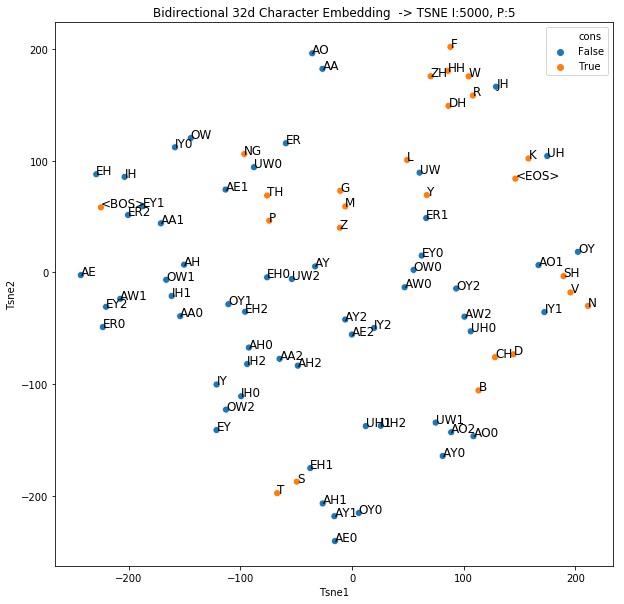

In [40]:
norm = Normalizer()
pre_class_norm=norm.fit_transform(pre_class.iloc[:,1:-2])

pca = PCA(n_components=25)
pre_class_pca=pca.fit_transform(pre_class_norm)

model=TSNE(n_iter=10000, perplexity=5.0)
twod=model.fit_transform(pre_class_pca)

tsne=pd.DataFrame()
tsne['Tsne1']=twod[:,0]
tsne['Tsne2']=twod[:,1]
tsne['char']=pre_class.index
tsne=tsne.set_index('char')
tsne['cons']=pre_class.loc[:,'cons']

fig,ax=plt.subplots(figsize=(10,10))
fig=sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='cons',data=tsne, s= 50)
fig.set_title("Bidirectional 32d Character Embedding  -> TSNE I:5000, P:5")

for line in range(0,tsne.shape[0]):
     fig.text(tsne.Tsne1[line]+0.01, tsne.Tsne2[line], 
     tsne.index[line], horizontalalignment='left', 
     size='large', color='black', weight='normal')


## Phonological error classifier

In [41]:
import vocab
import lm
def get_hidden_reps(model, test_data, c2i, i2c):
    """
    Compute classification accuracy for the test_data against the model & 
    Return classifications and hidden representations for test_data
    
    :param model: The trained model to use
    :param test_data: A list of (x,y) test pairs.
    :returns: The classification accuracy (n_correct / n_total), 
    as well as the predictions, and hidden representations
    :rtype: tuple(float, list(str))
    """
    in_col_1='X1'
    in_col_2='X2'
    out_col='y'

    X1_tensor_seq=test_data.loc[:,in_col_1].apply(lambda x: vocab.sentence_to_tensor(x, c2i,True))
    X2_tensor_seq=test_data.loc[:,in_col_2].apply(lambda x: vocab.sentence_to_tensor(x, c2i,False))

    y_int_seq=test_data.loc[:,out_col]

    correct=[]
    labs=[]
    hiddens=[]
    
    data=zip(X1_tensor_seq,X2_tensor_seq,y_int_seq)
    with torch.no_grad():
        for X1, X2, y in data:
            
            out, (h_p, h_t)= model.forward(X1, X2, model.init_hidden())
            i=np.argmax(out)

            labs.append(i.item())
            correct.append(i==y)

            hiddens.append(np.concatenate([h_p[1].squeeze().numpy(),h_t[1].squeeze().numpy()]))
    yes=0.0
    no=0.0
    total=0.0
    for entry in correct:
        total+=1
        if entry:
            yes+=1
        else:
            no+=1
    return(yes/total, list(labs), np.array(hiddens))


In [42]:
from sklearn.model_selection import train_test_split
from ast import literal_eval

mappdFile='data/mappd_example.csv'
mappd=pd.read_csv(mappdFile)
modified_mappd=mappd

input_label='Production.Arpabet'
input_label_2='Target ARPAbet'
codes_label='Code in our Taxonomy'

label_label='Phonological' #Column created for +/- phon label
binary_dict={'Formal':1,'Mixed':1,"P.R.Neologism":1,'Semantic':0, 'Other':0,'A.Neologism':0}
modified_mappd[label_label]=mappd.loc[:,codes_label].apply(lambda x: binary_dict[x])

phon_label_col=modified_mappd.loc[:,label_label]
code_label_col=modified_mappd.loc[:,codes_label]

training_col_1=modified_mappd.loc[:,input_label].apply(lambda x: list(literal_eval(x)))
training_col_2=modified_mappd.loc[:,input_label_2].apply(lambda x: literal_eval(x)[0])

codes=set(modified_mappd.loc[:,codes_label])

X1_train, X1_test, X2_train, X2_test, y_train, y_test,y_bi_train, y_bi_test = train_test_split(training_col_1, training_col_2, code_label_col, phon_label_col, test_size=0.33)

o2i, i2o=build_vocab(codes, pad_syms=False)


reload=False
if reload:
    
    phon_model = lm.ProductionPhonClassifier(
    input_vocab_size=len(c2i),
    n_embedding_dims=32,
    n_hidden_dims=20,
    n_lstm_layers=1,
    output_class_size=2,
    pretrained_embedding=embedding_weights)
    phon_model=lm.train_output_binary(phon_model, epochs=10, training_inputs_1=X1_train,training_inputs_2=X2_train, c2i=c2i, training_outputs=y_bi_train)
    torch.save(phon_model,'phon_lstm.mod')
else: 
    phon_model=torch.load('phon_lstm.mod')



             precision    recall  f1-score   support

          0       0.68      0.64      0.66       937
          1       0.76      0.79      0.78      1374

avg / total       0.73      0.73      0.73      2311

Binary Accuracy: 0.7299870186066638


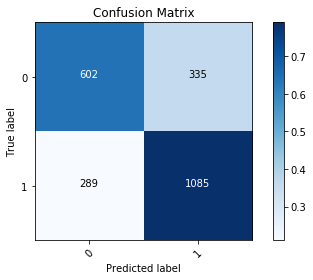

In [43]:
eval_pd=pd.DataFrame()
eval_pd['X1']=X1_test
eval_pd['X2']=X2_test
eval_pd['y']=y_bi_test

acc, predictions, hiddens=get_hidden_reps(phon_model, eval_pd, c2i, i2c)
eval_pd['yhat']=predictions

print(classification_report(y_bi_test, predictions))
print('Binary Accuracy:',acc)

cm = confusion_matrix(y_bi_test, predictions)
lm.pretty_conf_matrix(cm, [0,1])

In [44]:
eval_pd['correct']=eval_pd['y']==eval_pd['yhat']
mapping={True: 'correct', False: 'incorrect'}
eval_pd['correct']=eval_pd.correct.apply(lambda x: mapping[x])


In [45]:
norm = Normalizer()
hidden_norm=norm.fit_transform(hiddens)

pca = PCA(n_components=20)
hidden_pca=pca.fit_transform(hidden_norm)

model=TSNE(n_components=2, n_iter=5000, perplexity=5.0)
twod=model.fit_transform(hidden_pca)

eval_pd_t=eval_pd.copy()
eval_pd_t['Tsne1']=twod[:,0]
eval_pd_t['Tsne2']=twod[:,1]

In [46]:
data=eval_pd_t
data['y_str']=data.y.apply(str)
data_correct=data[data.correct.isin(['correct'])].dropna()
data_incorrect=data[data.correct.isin(['incorrect'])].dropna()

palette = d3['Category10'][3]
color_map = CategoricalColorMapper(factors=data.y_str.unique(), palette=palette)

source_true = ColumnDataSource(data_correct)
source_false = ColumnDataSource(data_incorrect)

TOOLTIPS = [
    ("Classified correctly?", "@correct"),
    ("Production", "@X1"),
    ("Target", "@X2"),
    ("Phonological Error?", "@y"),

]

p=figure(x_axis_label='Tsne 1',y_axis_label='Tsne 2',plot_width=700, plot_height=700,tooltips=TOOLTIPS)
p.circle(x='Tsne1', y='Tsne2',
         color={'field': 'y_str', 'transform': color_map}, 
         alpha=.5,
         legend='correct',
         source=source_true,
         size=7)

p.cross(x='Tsne1', y='Tsne2',
         color={'field': 'y_str', 'transform': color_map}, 
         legend='correct',
         source=source_false,
         size=7)
p.legend.location = "top_left"
p.legend.click_policy="hide"


In [47]:
show(p)

In [49]:
data=eval_pd_t
data['X2']=data['X2'].apply(lambda x :  ''.join(x))
data['X1']=data['X1'].apply(lambda x :  ''.join(x))


data['y_str']=data.y.apply(str)

target_words=['FLAW1ER0', 'STEH1THAH0SKOW2P', 'DEH1SK', 'KAE1N', 'NEH1KLAH0S',
       'BEH1LT', 'SPUW1N', 'SUW1T', 'TAW1AH0L', 'VAA0LKEY1NOW0', 'KAW1',
       'BUW1T', 'AE1PAH0L', 'LIY1F', 'NOW1Z', 'SAE1DAH0L',
       'CHIH1RLIY2DER0Z', 'HHAE1MER0', 'THER0MAA1MAH0DER0', 'DAO1R']

data_subset=data[data.X2.isin(target_words)].dropna()
data=data_subset

    
data_correct=data[data.correct.isin(['correct'])].dropna()
data_incorrect=data[data.correct.isin(['incorrect'])].dropna()



palette = d3['Category20'][len(data.X2.unique())]
color_map = CategoricalColorMapper(factors=data.X2.unique(), palette=palette)

source_true = ColumnDataSource(data_correct)
source_false = ColumnDataSource(data_incorrect)

TOOLTIPS = [
    ("Classified correctly?", "@correct"),
    ("Production", "@X1"),
    ("Target", "@X2"),
    ("Phonological Error?", "@y"),

]

p=figure(x_axis_label='Tsne 1',y_axis_label='Tsne 2',plot_width=700, plot_height=700,tooltips=TOOLTIPS)
p.circle(x='Tsne1', y='Tsne2',
         color={'field': 'X2', 'transform': color_map}, 
         alpha=.5,
         legend=['correct'],
         source=source_true,
         size=7)

p.cross(x='Tsne1', y='Tsne2',
         color={'field': 'X2', 'transform': color_map}, 
         legend='X2',
         source=source_false,
         size=14)
p.legend.location = "top_left"
p.legend.click_policy="hide"

In [50]:
show(p)